In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [491]:
df = pd.read_table('species_counts.tsv', sep='\t', header=0, index_col=3, dtype={'country_s':str, '#_Records':np.float64, '#_Species':np.float64, 'geonames_id':np.int32})
geo = pd.read_table('geography_data.txt', sep ='\t', header=0, index_col=1, dtype={'country_g':str, 'geonames_id':np.int32, 'area_km2':np.float64, 'percent_water':np.float64, 'population_density':np.float64, 'gdp_nominal':np.float64, 'gdp_ppp':np.float64, 'gini':np.float64, 'hdi':np.float64})
eco = pd.read_table('ecoregions.tsv', sep='\t', header=0, index_col=4, dtype={'ecozone':str, 'biome':str, 'ecoregion':str, 'country_e':str, 'geonames_id':np.int32})
print(df.shape)
print(geo.nsmallest(10, 'area_km2'))
print(eco.shape)

(243, 3)
                             country_g  area_km2  percent_water  \
geonames_id                                                       
3164670                   Vatican_City      0.44            NaN   
2993457                         Monaco      2.02           0.00   
2411586                      Gibraltar      6.70           0.00   
4031074                        Tokelau     10.00           0.00   
1547376                  Cocos_Islands     14.00           0.00   
2110425                          Nauru     21.00           0.57   
3578476               Saint_Barthelemy     25.00           0.00   
2110297                         Tuvalu     26.00           0.00   
5854968      US_Minor_Outlying_Islands     34.20          88.60   
2155115                 Norfolk_Island     34.60           0.00   

             population_density  gdp_nominal  gdp_ppp  gini    hdi  
geonames_id                                                         
3164670                 2272.00          NaN    

In [492]:
all_data = pd.concat([df, geo], axis=1, join_axes=[df.index])
print(all_data.shape)
all_data['records_per_area'] = all_data['#_Records']/all_data['area_km2']
all_data['records_per_species'] = all_data['#_Records']/all_data['#_Species']
all_data['species_per_area'] = all_data['#_Species']/all_data['area_km2']
#print(all_data.nlargest(10, 'species_per_area'))
a = all_data.nlargest(1, '#_Records')
b = all_data.nlargest(1, '#_Species')
c = all_data.nlargest(1, 'records_per_area')
d = all_data.nlargest(1, 'records_per_species')
e = all_data.nlargest(1, 'species_per_area')
print('The country with the most records is ' + a.iloc[0]['country_s'] + ' with ' + str(a.iloc[0]['#_Records']))
print('The country with the most species is ' + b.iloc[0]['country_s'] + ' with ' + str(b.iloc[0]['#_Species']))
print('The country with the most records per square km is ' + c.iloc[0]['country_s'] + ' with ' + str(c.iloc[0]['records_per_area']))
print('The country with the most records per species is ' + d.iloc[0]['country_s'] + ' with ' + str(d.iloc[0]['records_per_species']))
print('The country with the most species per square km is ' + e.iloc[0]['country_s'] + ' with ' + str(e.iloc[0]['species_per_area']))
print('\n')
a = all_data.nsmallest(1, '#_Records')
b = all_data.nsmallest(1, '#_Species')
c = all_data.nsmallest(1, 'records_per_area')
d = all_data.nsmallest(1, 'records_per_species')
e = all_data.nsmallest(1, 'species_per_area')
print('The country with the least records is ' + a.iloc[0]['country_s'] + ' with ' + str(a.iloc[0]['#_Records']))
print('The country with the fewest species is ' + b.iloc[0]['country_s'] + ' with ' + str(b.iloc[0]['#_Species']))
print('The country with the least records per square km is ' + c.iloc[0]['country_s'] + ' with ' + str(c.iloc[0]['records_per_area']))
print('The country with the least records per species is ' + d.iloc[0]['country_s'] + ' with ' + str(d.iloc[0]['records_per_species']))
print('The country with the least species per square km is ' + e.iloc[0]['country_s'] + ' with ' + str(e.iloc[0]['species_per_area']))

(243, 11)
The country with the most records is Sweden with 82325554.0
The country with the most species is Brazil with 90249.0
The country with the most records per square km is Bermuda with 1385.26315789
The country with the most records per species is Sweden with 1685.34134458
The country with the most species per square km is Vatican City with 111.363636364


The country with the least records is Tokelau with 1.0
The country with the fewest species is Tokelau with 1.0
The country with the least records per square km is South Sudan with 0.00221704087972
The country with the least records per species is Tokelau with 1.0
The country with the least species per square km is Libya with 0.000559805085531


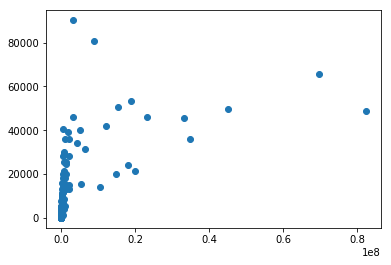

In [493]:
plt.scatter(all_data['#_Records'], all_data['#_Species'])
plt.show()

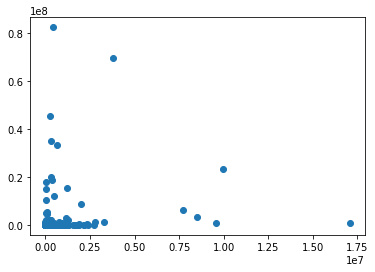

In [494]:
plt.scatter(all_data['area_km2'], all_data['#_Records'])
plt.show()

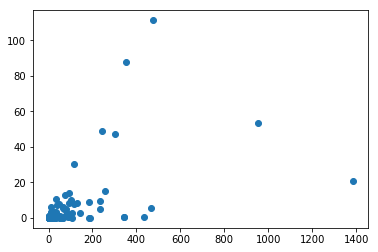

In [495]:
plt.scatter(all_data['records_per_area'], all_data['species_per_area'])
plt.show()

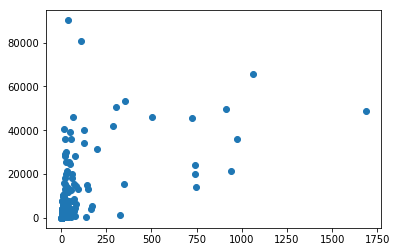

In [496]:
plt.scatter(all_data['records_per_species'], all_data['#_Species'])
plt.show()

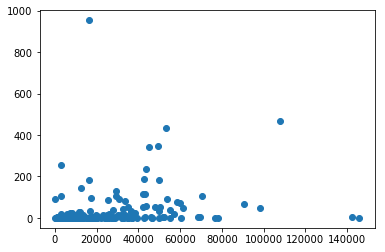

In [497]:
plt.scatter(all_data['gdp_ppp'], all_data['records_per_area'])
plt.show()

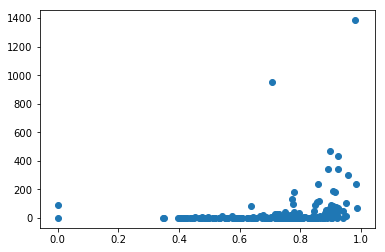

In [498]:
plt.scatter(all_data['hdi'], all_data['records_per_area'])
plt.show()

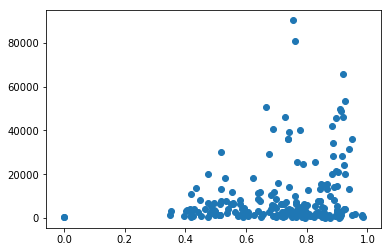

In [499]:
plt.scatter(all_data['hdi'], all_data['#_Species'])
plt.show()

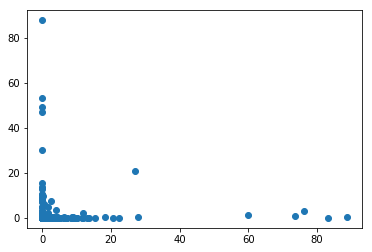

In [500]:
plt.scatter(all_data['percent_water'], all_data['species_per_area'])
plt.show()

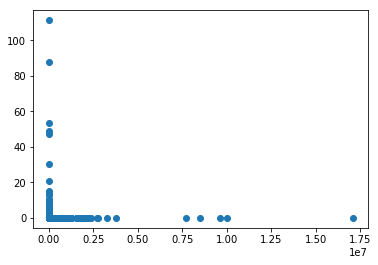

In [501]:
plt.scatter(all_data['area_km2'], all_data['species_per_area'])
plt.show()